Splitting the data into Training and Testing 
- Break data into training set and testing set.
- sklearn library has inbuilt methods to do this
    - train_test_split from sklearn.model_selection module does this for you
        - It shuffles data to randomize it and then splits them into train and test data sets 
     
        

In [1]:
from sklearn.datasets import load_digits

In [2]:
digits = load_digits()

In [3]:
digits.data.shape

(1797, 64)

In [4]:
digits.target.shape

(1797,)

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
# train_test_split accepts three agrumnets
# 1. data 2. target and 3. Seed value so everytime you get the same randomized results.
# you may choose any value as seed but just stick with the same through out your code
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, random_state=11)

In [7]:
# so as you see below about 85 records are in train dataset and 25% for test
# there are additional arguments to train_test_split that allows you to control how you want to split your data
X_train.shape

(1347, 64)

In [8]:
X_test.shape

(450, 64)

In [9]:
## Now we are going to create a model object or estimator.
## particular class in sklearn.neighbors package that we use is KNeighborsClassifier
## this is predefined class that implements KNeighbors algorithm
## you import this class and then create instance of it for use
## at the time of creating instance, you can provide hyperparameters
## look at documentation for keyworkd arguments and default values for this classifier.
from sklearn.neighbors import KNeighborsClassifier

In [10]:
knn = KNeighborsClassifier()

In [11]:
# these is no training phase 
# the algorithm just loads the data
# each of the scikit-learn estimator has fit method that you use to train your model
# Training occurs based on algorithm
# In KNeighbors there is no training it just loads the data in memory
# In other algorithms, it may take long time to train your model
# It takes long time for deep learning of large dataset if you are using CPU.
# So Google and NVDA has simple raspberry pi GPUs that you can connect to your computer for faster processing.
# google has tensor processing units (TPUs) - can significantly reduce your training time.
knn.fit(X=X_train, y=y_train)

# n_neighbors= 5 is the default value for K used by algorithm
# you always use odd value for this , as you want to avoid a tie between nearest neighbors.

KNeighborsClassifier()

In [12]:
# KNeighbors classifier is called lazy. as it doesn't do any training
# at the time of making prediction, it goes through the data , alalyzes it based on KNeighbors alogorithm 
# and makes predictions
# Now that we have trained data using fit
# we can use predict method to predict on our test dataset
predicted = knn.predict(X=X_test)
# predicted is one dimentional array with prediction

In [13]:
# now just for convenience assigning y_test to expected 
# this is array of target values for our test dataset. We can use this to see how good the prediction was.
expected = y_test

In [14]:
predicted[:20]

array([0, 4, 9, 9, 3, 1, 4, 1, 5, 0, 4, 9, 4, 1, 5, 3, 3, 8, 5, 6])

In [15]:
expected[:20]

array([0, 4, 9, 9, 3, 1, 4, 1, 5, 0, 4, 9, 4, 1, 5, 3, 3, 8, 3, 6])

In [16]:
# 19th element was incorrectly predicted.
# use list comprehension to find out incorrect predictions
wrong = [(p, e) for (p, e) in zip(predicted, expected) if p != e]

In [17]:
# 10 out of 450 are wrong
wrong

[(5, 3),
 (8, 9),
 (4, 9),
 (7, 3),
 (7, 4),
 (2, 8),
 (9, 8),
 (3, 8),
 (3, 8),
 (1, 8)]

In [18]:
# wrong percentage
10 / 450 * 100

2.2222222222222223

In [19]:
# right percentage
# We achieved 97.8 % acuracy by just using default values for the model.
440 / 450 * 100

97.77777777777777

In [20]:
# score method ca be used for acuracy  percentage
print(f'{knn.score(X_test, y_test):.2%}')

97.78%


another way to get classification acuracy is by confusion metrics
It shows in two dimentational way - correct predictions that hit the target 
and incorrect predictions that miss the target
and not only that for each of the misses, it tells you what they were classified as.


In [21]:
from sklearn.metrics import confusion_matrix

In [22]:
confusion = confusion_matrix(y_true=expected , y_pred=predicted)

In [23]:
confusion
# Note that we have 10 different images to classify.
# confusion returned 10 X 10 two dimentational array
# in row 1 : all 45 zeros are predicted as zeros(not 2 , 3, or any other number)
# similarly, there are 45 ones and all 45 predicted as one's correctly
# take a look at row 9 : this is digit 8.
    # there are 44 images for 8 in the test set, and only 39 were predicted correctly
    # 8 was confused for ones , twos, two preditcions for three etc.


array([[45,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 45,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 54,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 42,  0,  1,  0,  1,  0,  0],
       [ 0,  0,  0,  0, 49,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 38,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 42,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 45,  0,  0],
       [ 0,  1,  1,  2,  0,  0,  0,  0, 39,  1],
       [ 0,  0,  0,  0,  1,  0,  0,  0,  1, 41]])

In [24]:
# so acuracy for preduction of 8 is
39/44

0.8863636363636364

In [25]:
# It is important to have balanced dataset - where samples are evenly distributed to represent different types of classification
# i.e. sample should have nearly same amount of samples for 1s , 2s , 3s .. 9s.

In [26]:
# classification report class creates a report of scores 
from sklearn.metrics import classification_report

In [27]:
# classification report requires names in string format for displaying report
# we are using digits.target_names in this case
names = [str(digit) for digit in digits.target_names]

In [28]:
names

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [29]:
print(classification_report(expected, predicted, target_names=names))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       0.98      1.00      0.99        45
           2       0.98      1.00      0.99        54
           3       0.95      0.95      0.95        44
           4       0.98      0.98      0.98        50
           5       0.97      1.00      0.99        38
           6       1.00      1.00      1.00        42
           7       0.96      1.00      0.98        45
           8       0.97      0.89      0.93        44
           9       0.98      0.95      0.96        43

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



In [30]:
# precision is column wise precision
# 0 has 100 % precision. Look at the first column : no other number was confused with zero
# 1 has 98% precision.  One number 8 image was confused for 1. But 45 were acurately predicted. so 45/46 = 0.98 rounded.

# recall is row wise precision
# row 3 has 54 twos. All twos were predicted correctly and none was consused with other number in prediction
# row 9 has 39 correct predictions for 8 and you can see 8 was confused for 1 , 2, 3 and also for 9.
# we have seen before that for 8 recall percentage is 0.89 when rounded to two digits.

# f1-score is average of precision and recall
# support is total number of samples for each number image.


In [31]:
# you can also visualize confusion matrix using seaborn's heatmap feature.
# you can experiment with different color maps available to you.
# seaborn can use rownames and column names for labeling as part of visulaization
# so we are converting confusion metrics to pandas data frame.
import pandas as pd

In [32]:
# convert confusion metrics to dataframe
confusion_df = pd.DataFrame(confusion, index=range(10), columns=range(10))

In [33]:
confusion_df.head()

,0,1,2,3,4,5,6,7,8,9
0,45,0,0,0,0,0,0,0,0,0
1,0,45,0,0,0,0,0,0,0,0
2,0,0,54,0,0,0,0,0,0,0
3,0,0,0,42,0,1,0,1,0,0
4,0,0,0,0,49,0,0,1,0,0


In [34]:
import seaborn as sns
import matplotlib as plt

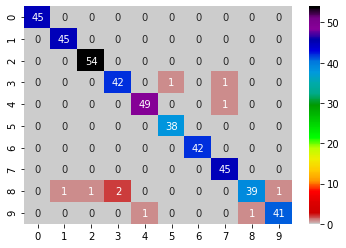

In [35]:
# seaborn automatically creates axes object for you
# we are enabling annotation
# cm.nippy_spectral_r - is rainbow color colormap.
# you get nice visualization for your confusion metrics displayed as a heatmap
# annotation is on the right hand side. lighter color for lesser values and deeper darker colors for higher values.
axes = sns.heatmap(confusion_df, annot=True, cmap=plt.cm.nipy_spectral_r)

# kfold cross validation
# split the data into multiple folds and use each of the fold for training as well as testing

In [36]:
from sklearn.model_selection import KFold

In [37]:
kfold = KFold(n_splits=10, random_state=11, shuffle=True)
# creates kfold object (cross validator)
# number of splits 10
# shuffle is true before splitting the data


In [38]:
from sklearn.model_selection import cross_val_score

In [41]:
scores = cross_val_score(estimator=knn, X=digits.data, y=digits.target, cv=kfold)
# we are providing data and target as well as cross validator object - kfold
# we are creating 10 folds. 9 of them will be used for trainng and 1 for testing.
# we do this 10 times, so each dataset is used for testing as well as training.

In [42]:
# We get back array of accuracy scores from above cross_val_score 
# one accuracy score for one of the iteration
scores

array([0.97777778, 0.99444444, 0.98888889, 0.97777778, 0.98888889,
       0.99444444, 0.97777778, 0.98882682, 1.        , 0.98882682])

In [44]:
# average acuracy
print(f'Mean accuracy {scores.mean():.2%}')
# we are trainng with 90% data and 10 % data for testing


Mean accuracy 98.78%


In [45]:
# standard deviation
print(f'standard deviation {scores.std():.2%}')

standard deviation 0.74%


# Running multiple models to find out best with kfold


In [46]:
# USING KNN, SVC and GAUSSIANNB 
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [48]:
# creating dictionary of estimator objects

estimators = {
    'KNeighboursClassifier': knn,
    'SVC': SVC(gamma='scale'),
    'GaussianNB': GaussianNB()
}

In [50]:
#looping over each estimator and using kfold to train and test with each estimator
for estimator_name, estimator_object in estimators.items():
    kfold = KFold(n_splits=10, random_state=11, shuffle=True)
    scores = cross_val_score(estimator=estimator_object, X=digits.data, y=digits.target, cv=kfold)
    print(f'{estimator_name:>20}' + f'Mean accuracy {scores.mean():.2%}' + f'standard deviation {scores.std():.2%}')

KNeighboursClassifierMean accuracy 98.78%standard deviation 0.74%
                 SVCMean accuracy 98.72%standard deviation 0.79%
          GaussianNBMean accuracy 84.48%standard deviation 3.47%


# using different k values (hyperparameter) to test the results


In [51]:
#looping over different values of k and using kfold with knn estimator to train and test
for k in range(1, 20, 2):
    kfold = KFold(n_splits=10, random_state=11, shuffle=True)
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(estimator=knn, X=digits.data, y=digits.target, cv=kfold)
    print(f'k={k:<2}' + f'Mean accuracy {scores.mean():.2%}' + f'standard deviation {scores.std():.2%}')

k=1 Mean accuracy 98.83%standard deviation 0.58%
k=3 Mean accuracy 98.83%standard deviation 0.72%
k=5 Mean accuracy 98.78%standard deviation 0.74%
k=7 Mean accuracy 98.44%standard deviation 0.96%
k=9 Mean accuracy 98.39%standard deviation 0.80%
k=11Mean accuracy 98.33%standard deviation 0.90%
k=13Mean accuracy 97.89%standard deviation 0.89%
k=15Mean accuracy 97.83%standard deviation 0.95%
k=17Mean accuracy 97.50%standard deviation 1.00%
k=19Mean accuracy 97.66%standard deviation 0.96%


In [52]:
#

check cross_validate function to do cross validation (we used score in our examples)
- it performs validation and time the results.

# this chart is available on scikit learn website
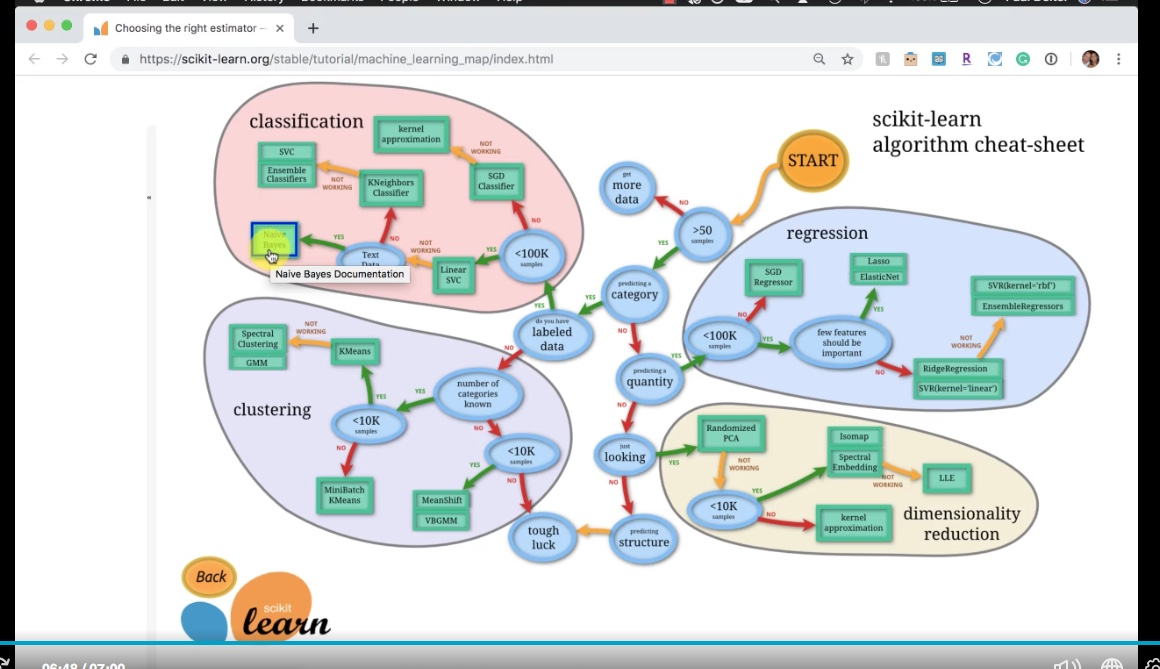
